# FAKE NEWS DETECTOR

### By Tania Batista

 
 _________________________________________

CLASSIFY TEXT DATASET, USING COUNTVECTORIZER, TO PREDICT FAKE NEWS

In [ ]:
# IMPORT FAKE_OR_REAL NEWS CSV DATA SET

#Import COUNTVECTORIZER AND TRAINTESTSPLIT
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

print(df.head())

# y = create label col where the predictions will go
y = df.label

# Create training and test sets using
# Xtrain, Xtest, ytrain, ytest = traintestsplit
# FEATURES df['text']
#Target Y
# 33% will be tested. 
#RS 53.

X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

# Initialize = CountVectorizer (remove stop words)
    #vectorizes TEXT ---> Bag of Words / FEATURES
count_vectorizer = CountVectorizer(stop_words='english')

# .fit_transform xTRAINING DATA --> Bag of Words / {word_id, vectors}
    # represents how many times each word appears
count_train = count_vectorizer.fit_transform(X_train)

# .transform the xTEST DATA -->  Bag of Words / {word_id, vectors}
count_test = count_vectorizer.transform(X_test)

# for count_vectorizer .get features_names of first [10] colvalues of df['text']
print(count_vectorizer.get_feature_names()[:10])


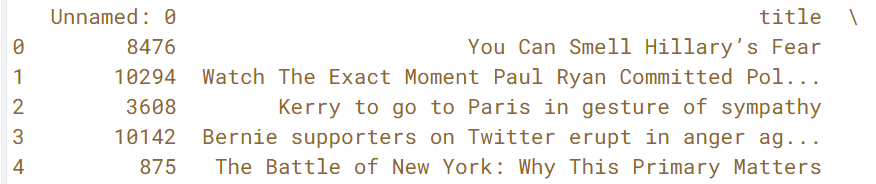

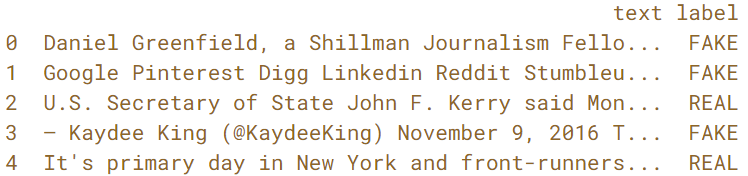

CLASSIFY TEXT DATASET, USING TFIDF VECTORIZER, TO PREDICT FAKE NEWS

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer object (remove stopwords)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# tfidf... fit_transform(the X_training data)      {id, vectors}
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# tfidf... transform(the X_testing data)     {id, vectors}
tfidf_test = tfidf_vectorizer.transform(X_test)

# print tfidf_vectorizer object, .get_feature_names() for first [:10] features
print(tfidf_vectorizer.get_feature_names()[:10])

# print first5 tfidf_train data, by slicing on tfidf_train.Array[:5] attribute
print(tfidf_train.A[:5])

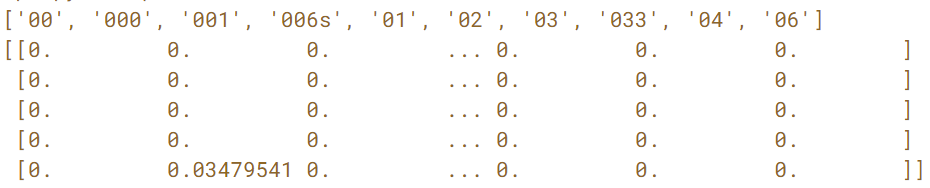

INSPECT THE VECTORS BY CONVERTING THEM INTO PANDAS DATAFRAMES

In [ ]:
# Investigate how the vectors work by converting them into 
# pd.DataFrame(value, columns/features) 

# Create the CountVectorizer DataFrame:
    # value is count_train.ArrayAttribute, 
    # columns=count_vectorizer.get_feature_names()
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame:
    # value is tfidf_train.ArrayAttribute, 
    # column=tfidf_vectorizer.get_feature_names()
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print count_df head to investigate df structure
print(count_df.head())

# Print tfidf_df head 
print(tfidf_df.head())

# create a new object, difference, to see the difference between the 2 DFs
# from set(count_df.columns), subtract set(tfidf_df.columns)
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Test if the two DataFrames are equivalent
# on count_df, use .equals() method, with (tfidf_df as the argument)
print(count_df.equals(tfidf_df))


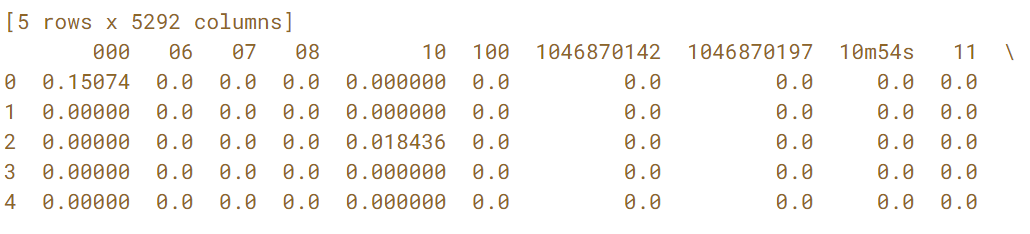

TRAINING AND TESTING NAIVE BAYES CLASSIFICATION MODEL - USING CountVectorizer DATA

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags
pred = nb_classifier.predict(count_test)

In [ ]:

# Calculate the accuracy score
score = metrics.accuracy_score(y_test, pred)
print(score)

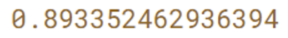

In [ ]:
# Calculate the confusion matrix: 
    # specify keyword arg labels=['FAKE', 'REAL']
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)


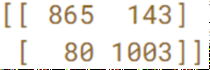

TRAINING AND TESTING NAIVE BAYES CLASSIFICATION MODEL - USING TfidfVectorizer DATA

In [ ]:
# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the classifier to TRAININGDATA, YTRAIN
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags for TESTDATA ONLY
pred = nb_classifier.predict(tfidf_test)

In [ ]:
# Calculate the accuracy score: YTEST, PRED
score = metrics.accuracy_score(y_test, pred)
print(score)

In [ ]:
# Calculate the confusion matrix: YTEST, PRED
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

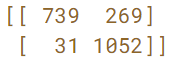

IMPROVING ACCURACY

TFIDF Vectors will determine the best performing combination using different alpha levels

In [ ]:
# Create the list of alphas to try using np.arange()
#  Values range from 0 to 1 with steps of 0.1
alphas = np.arange(0, 1,  0.1)

# Create a function, train_and_predict(alpha)
def train_and_predict(alpha):
    # Instantiate MultinomialNB classifier with alpha=alpha
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data, tfidf_train
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels on test data, tfidf_test
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy_score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas 
    # print: alpha, newline, train_and_predict()'s corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print() 


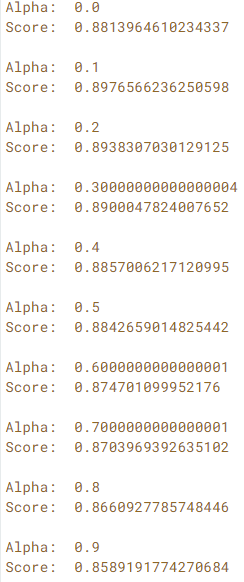

INSPECT THE MODEL: Mapping vector weights --> back to actual words

In [ ]:
# Get the class_labels by accessing the nb_classifier attribute, .classes_ 
class_labels = nb_classifier.classes_

# Extract the features using the tfidf_vectorizer.get_feature_names() method
feature_names = tfidf_vectorizer.get_feature_names()

# Create a zipped [array] of the classifier.coefficients and feature_names 
    # use zip(nb_classifier.coef_[0], feature_names)
# Sort by weights on the outside, sorted()
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# for the first entry of class_labels, print top 20 weighted features feat_with_weights 
print(class_labels[0], feat_with_weights[:20])

# for the second label of class_labels, print  bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


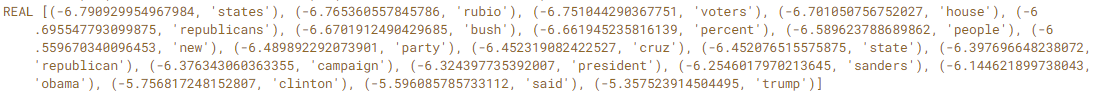

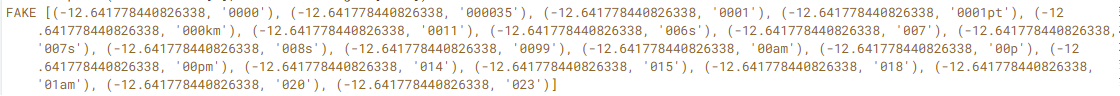